# First Assignment 

---

> Nikolaos Antonopoulos <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> antonopoulosn@hotmail.com

## Getting ready for the magic 
* Firstly, we have to import some packages that will be needed. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
pd.options.mode.chained_assignment = None  

* The last line is used to prevent unwanted warnings!

## Obtaining the Data
  * Our next step is to obtain the data that we will use for our analysis.    
  * The main Dataset was obtained from [NOAA](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:GR000016716/detail?fbclid=IwAR3-FLPJNkYJNFFuFeXe2EnEzJiPMYYa0uik3zG6GxQnpqgzd32d7-PHKic)
  * After uncompressing the file we get the :<code> '2758198.csv' </code>  
  * We will be reffering to this dataset by the name <code>data</code>


In [2]:
data = "2758198.csv"

* Now, we will work with with the <code>DATE</code> column in 3 steps 
1. First, we will parse the column into 'datetime64' type.
2. Second, we will check that each date exists only once in the column.
3. Lastly, since we made sure that dates are unique, we will assign them as index. 
*The third step is going to be useful in the future*

In [3]:
data = pd.read_csv(data, parse_dates=['DATE'])
data['DATE'].value_counts().iloc[:1]
data.set_index('DATE', inplace=True)
data

STATION            NAME  PRCP  SNWD  TAVG  TMAX  TMIN
DATE                                                                 
1955-01-01  GR000016716  HELLINIKON, GR   0.0   NaN   NaN  18.5  10.2
1955-01-02  GR000016716  HELLINIKON, GR   2.0   NaN   NaN  14.4   7.0
1955-01-03  GR000016716  HELLINIKON, GR   0.0   NaN   NaN  15.8   9.6
1955-01-04  GR000016716  HELLINIKON, GR   0.0   NaN   NaN  18.8   7.3
1955-01-05  GR000016716  HELLINIKON, GR   0.0   NaN   NaN  17.9   8.4
...                 ...             ...   ...   ...   ...   ...   ...
2020-12-27  GR000016716  HELLINIKON, GR   0.0   NaN  16.6   NaN   NaN
2020-12-28  GR000016716  HELLINIKON, GR   6.6   NaN  14.8  18.2  11.9
2020-12-29  GR000016716  HELLINIKON, GR   0.0   NaN  16.3  19.9  12.5
2020-12-30  GR000016716  HELLINIKON, GR   0.0   NaN  16.4  19.9  14.8
2020-12-31  GR000016716  HELLINIKON, GR   0.0   NaN  15.4  18.2   NaN

[23251 rows x 7 columns]

* However, some useful data are missing from our dataset  
* So, we will use a supplementary dataset to fill the blanks.  
* The supplementary dataset was obtained through:  [this link](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f) 
* After uncompressing the file we get the :<code> 'athens.csv' </code>  
* We will assign the second dataset to a variable called <code>'alternative_dataset' </code>  
and will follow the 3 steps that we did for the first dataset. 
* Also, we will name the columns according to the citation found [here](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f/resource/a7c024b3-8606-4f08-93e2-2042f5bd6748)


In [4]:
alternative_dataset = "athens.csv"
alternative_dataset = pd.read_csv(alternative_dataset)
alternative_dataset.columns = ["DATE","TAVG","TMAX","TMIN","HUM","hPa","HUM1","hPa1","HUM2","hPa2","PRCP","MEAN WS","Dominant WD","Wind Gust"]
alternative_dataset['DATE'] = pd.to_datetime(alternative_dataset['DATE']) 
alternative_dataset.set_index('DATE', inplace=True) 
alternative_dataset

TAVG  TMAX  TMIN   HUM  hPa  HUM1    hPa1    HUM2    hPa2  PRCP  \
DATE                                                                          
2010-01-02  15.6  15.7  15.5  57.4   70    45  1005.2  1008.7  1001.5   0.0   
2010-01-03  13.5  13.6  13.4  56.0   76    39  1011.7  1016.7  1008.6   0.0   
2010-01-04   9.5   9.6   9.5  50.7   60    38  1021.3  1023.1  1016.8   0.0   
2010-01-05  13.4  13.5  13.4  70.5   82    54  1018.7  1022.1  1015.5   0.0   
2010-01-06  16.8  16.9  16.8  79.3   83    72  1012.9  1015.6  1011.1   0.0   
...          ...   ...   ...   ...  ...   ...     ...     ...     ...   ...   
2019-12-27  10.1  10.2  10.0  60.3   79    44  1018.4  1019.9  1016.8   0.0   
2019-12-28   8.3   8.4   8.2  60.9   82    46  1016.0  1017.2  1014.2   7.2   
2019-12-29   6.4   6.5   6.4  73.4   82    66  1017.6  1018.9  1016.5   3.4   
2019-12-30   4.0   4.0   3.9  83.9   90    65  1020.0  1024.2  1016.6  12.4   
2019-12-31   6.4   6.5   6.3  72.3   86    58  1025.4  1026.7  1023.9   0.0   

            MEAN WS Dominant WD  Wind Gust  
DATE                                        
2010-01-02      6.8         WSW       20.7  
2010-01-03      5.0         WSW       15.4  
2010-01-04      4.3         NNE       11.0  
2010-01-05      7.9           S       19.8  
2010-01-06     15.2           S       34.3  
...             ...         ...        ...  
2019-12-27      2.9          NE        8.0  
2019-12-28      4.3          NE       12.8  
2019-12-29     10.6         NNE       24.5  
2019-12-30      5.1          NE       15.0  
2019-12-31      2.7           W        9.4  

[3651 rows x 13 columns]

### Building our final dataframe

* We want to fill the <code>NA/NaN</code> values of the main dataset.  
* The fact that we put <code>DATE</code> as index, helps us do such that! 

In [5]:
data['TAVG'].fillna(alternative_dataset['TAVG'],inplace=True)

### Merging the 2 dataframes 

* If we give a closer look to the data we see that some dates are missing entirely.  
* The solution to that problem is shown below: 
1. Append the supplementary dataset to the main.
2. Erase the dates from the supplementary that already exist.

In [6]:
merged_data=data.append(alternative_dataset)
merged_data = merged_data[~merged_data.index.duplicated(keep='first')]
merged_data = merged_data.sort_index()

> In order to process the Temperature Average column,  we have to:
1. Clear the column from unwanting attributes 
2. Parse it to float type 

In [7]:
data = merged_data[~merged_data['TAVG'].str.contains('---',na=False)]
data['TAVG'] = data['TAVG'].astype(float)

## Q2: DEVIATION OF SUMMER TEMPERATURES 

* Our first step here would be to find the baseline  for the summer months of the years 1974-1999 
1. We isolate the years from 1974 to 1999

In [8]:
data = data.reset_index()
mask = (data['DATE']>'1973-12-31') & (data['DATE'] <= '1999-12-31' ) 
dataframe_from_1974_to_1999 = data.loc[mask]

2. We isolate the months from June to August  

In [9]:
summer_months_from_1974_to_1999 = dataframe_from_1974_to_1999[((dataframe_from_1974_to_1999.DATE.dt.month >= 6) &(dataframe_from_1974_to_1999.DATE.dt.month < 9)  )]
dataframe_from_1974_to_1999

DATE      STATION            NAME  PRCP  SNWD  TAVG  TMAX  TMIN  \
6940  1974-01-01  GR000016716  HELLINIKON, GR   0.0   NaN  11.6  12.8  10.0   
6941  1974-01-02  GR000016716  HELLINIKON, GR   0.0   NaN  13.7  15.8  11.0   
6942  1974-01-03  GR000016716  HELLINIKON, GR  10.0   NaN  12.2  16.2  10.3   
6943  1974-01-04  GR000016716  HELLINIKON, GR   0.0   NaN  10.8  12.6   8.6   
6944  1974-01-05  GR000016716  HELLINIKON, GR   0.1   NaN   9.6  10.9   8.6   
...          ...          ...             ...   ...   ...   ...   ...   ...   
16431 1999-12-27  GR000016716  HELLINIKON, GR   0.0   NaN  15.4  19.0  10.6   
16432 1999-12-28  GR000016716  HELLINIKON, GR   0.0   NaN  16.9  19.8  12.8   
16433 1999-12-29  GR000016716  HELLINIKON, GR   0.0   NaN  15.1  18.4  14.4   
16434 1999-12-30  GR000016716  HELLINIKON, GR   0.0   NaN  13.4  16.8   8.2   
16435 1999-12-31  GR000016716  HELLINIKON, GR   9.9   NaN  14.9  17.4  13.2   

       HUM  hPa  HUM1  hPa1  HUM2  hPa2  MEAN WS Dominant WD  Wind Gust  
6940   NaN  NaN   NaN   NaN   NaN   NaN      NaN         NaN        NaN  
6941   NaN  NaN   NaN   NaN   NaN   NaN      NaN         NaN        NaN  
6942   NaN  NaN   NaN   NaN   NaN   NaN      NaN         NaN        NaN  
6943   NaN  NaN   NaN   NaN   NaN   NaN      NaN         NaN        NaN  
6944   NaN  NaN   NaN   NaN   NaN   NaN      NaN         NaN        NaN  
...    ...  ...   ...   ...   ...   ...      ...         ...        ...  
16431  NaN  NaN   NaN   NaN   NaN   NaN      NaN         NaN        NaN  
16432  NaN  NaN   NaN   NaN   NaN   NaN      NaN         NaN        NaN  
16433  NaN  NaN   NaN   NaN   NaN   NaN      NaN         NaN        NaN  
16434  NaN  NaN   NaN   NaN   NaN   NaN      NaN         NaN        NaN  
16435  NaN  NaN   NaN   NaN   NaN   NaN      NaN         NaN        NaN  

[9496 rows x 17 columns]

3. We calculate the mean of the Average Temperature and save it to a variable named baseline 

In [10]:
baseline = summer_months_from_1974_to_1999.TAVG.mean() 
baseline

26.23214585079631

* Moving on, we will find the mean Average Temperature of the summer months for each year 

In [11]:
all_summer_months = data[((data.DATE.dt.month >= 6) &(data.DATE.dt.month < 9)  )]
grouped_summer_months_by_year = all_summer_months.groupby(data.DATE.dt.year)
grouped_summer_months_by_year = grouped_summer_months_by_year['TAVG'].mean().reset_index()
grouped_summer_months_by_year

DATE       TAVG
0   1955        NaN
1   1956        NaN
2   1957  28.091935
3   1958  27.081522
4   1959        NaN
..   ...        ...
61  2016  28.154348
62  2017  28.088043
63  2018  27.436957
64  2019  28.034783
65  2020  27.380435

[66 rows x 2 columns]

* Lastly, we find the distance each year has from the baseline 

In [12]:
grouped_summer_months_by_year['distance_from_mean'] = grouped_summer_months_by_year.TAVG - baseline

### And we draw! 
* Matplotlib library helps us with that!

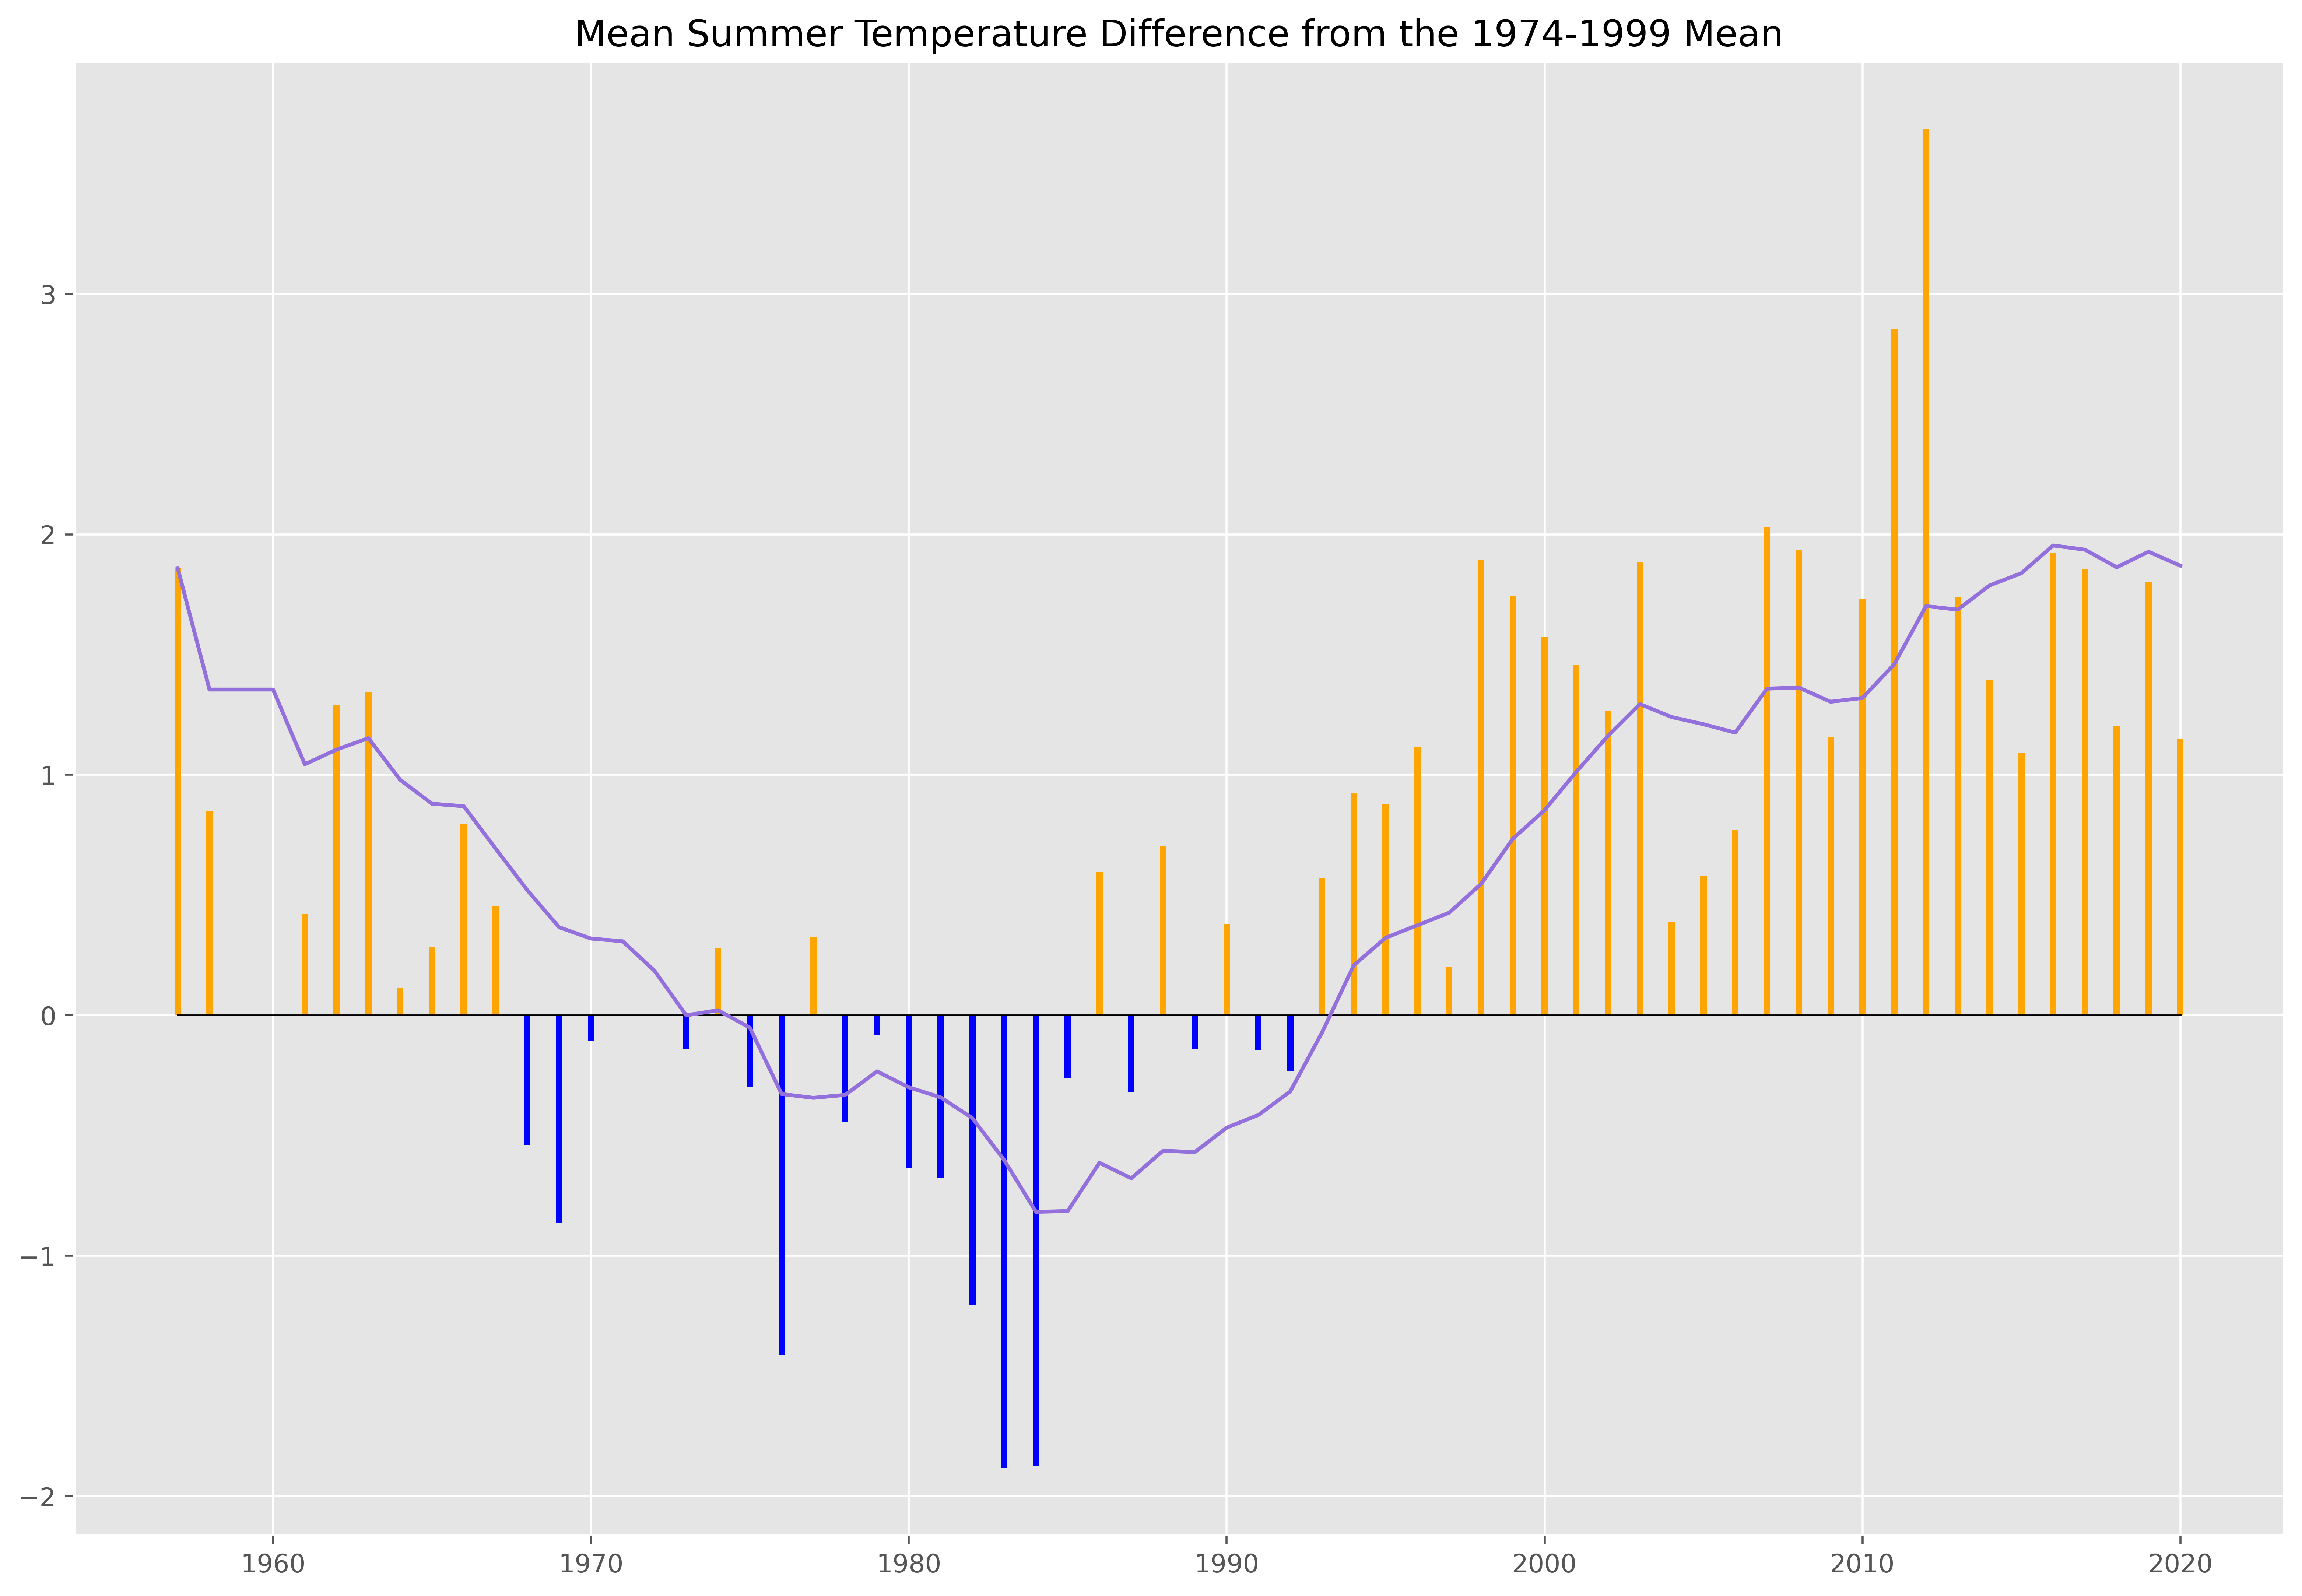

In [13]:
plt.rcParams['figure.dpi'] = 500
fig = plt.figure()
plt.style.use('ggplot')
ax = fig.add_axes([1,1,2,2])
xaxis = grouped_summer_months_by_year['DATE']
yaxis = grouped_summer_months_by_year['distance_from_mean']
colormat = np.where(yaxis > 0, 'orange','b')
ax.bar(xaxis,yaxis, color = colormat, width = 0.2)
x_coordinates = [1957,2020]
y_coordinates = [0,0]
plt.title("Mean Summer Temperature Difference from the 1974-1999 Mean")
plt.plot(x_coordinates,y_coordinates,color='black',lw = 0.7)
grouped_summer_months_by_year['MOVING AVERAGE'] = grouped_summer_months_by_year.distance_from_mean.rolling(window=10,min_periods=1).mean() 
plt.plot(grouped_summer_months_by_year['DATE'],grouped_summer_months_by_year['MOVING AVERAGE'],color='mediumpurple') 

### Intepretation
* Observing the graph we come to 3 results.
1. The period from 1968 to 1992 was the only one that had summers with mean temperature below the baseline, comparing to other periods that we studied in the range of 1955 to 2020
2. As far as peaks are concerned, on 1984-1985 we had relatively colder summers where on 2011-2012 we had the warmest summers. 
3. Taking a look at the rolling average, we observe that in the last 30 years  there is an upward trend, indicating that maybe warmer summers are imminent. This, is a warning to do something about climate change before it is too late. 
> Here, is a link, with [9 things we can do about climate change](https://www.imperial.ac.uk/stories/climate-action/) by the Grantham Institute.


## Q3 Evolution of Daily Temperatures 

* We keep only the columns we need for faster iteration.

In [14]:
dataframe_DATE_and_TAVG = data[['DATE','TAVG']] 

* We are getting the yearly Average Temperature for the full period  of 1955 to 2020

In [15]:
TAVG_for_each_year = dataframe_DATE_and_TAVG.groupby(dataframe_DATE_and_TAVG.DATE.dt.year)
TAVG_for_each_year = TAVG_for_each_year['TAVG'].mean().reset_index() 

* Our mission now is to create a plot showing the daily temperature for each year.
* Let's begin from calculating the average daily temperature for the baseline period of 1974-1999 
* Just as we did above we isolate the years from 1974 to 1999. 

In [16]:
mask = (dataframe_DATE_and_TAVG['DATE']>'1973-12-31') & (dataframe_DATE_and_TAVG['DATE'] <= '1999-12-31' ) 
dataframe_from_1974_to_1999 = dataframe_DATE_and_TAVG.loc[mask]
dataframe_from_1974_to_1999

DATE  TAVG
6940  1974-01-01  11.6
6941  1974-01-02  13.7
6942  1974-01-03  12.2
6943  1974-01-04  10.8
6944  1974-01-05   9.6
...          ...   ...
16431 1999-12-27  15.4
16432 1999-12-28  16.9
16433 1999-12-29  15.1
16434 1999-12-30  13.4
16435 1999-12-31  14.9

[9496 rows x 2 columns]

* We now have to group our data by month and day. 
* The 'groupby' method of pandas is our friend! 

In [17]:
daily_avg_temp = dataframe_from_1974_to_1999.groupby([dataframe_from_1974_to_1999.DATE.dt.month, dataframe_from_1974_to_1999.DATE.dt.day])['TAVG'].mean()
daily_avg_temp_dataframe = pd.DataFrame(daily_avg_temp) 

* A quick rename of the index so that its easier to understand.

In [18]:
daily_avg_temp_dataframe.index.names = ['month_index','day']
daily_avg_temp_dataframe

TAVG
month_index day           
1           1    10.365385
            2    10.707692
            3    10.207692
            4     9.634615
            5     9.919231
...                    ...
12          27    9.769231
            28   10.207692
            29   10.776923
            30   11.353846
            31   11.007692

[366 rows x 1 columns]

* Now, let's smoothen the line by using a 30 days rolling average. 

In [19]:
daily_avg_temp_dataframe['MOVING_AVERAGE'] = daily_avg_temp_dataframe['TAVG'].rolling(window=30,min_periods=1).mean() 
daily_avg_temp_dataframe

TAVG  MOVING_AVERAGE
month_index day                           
1           1    10.365385       10.365385
            2    10.707692       10.536538
            3    10.207692       10.426923
            4     9.634615       10.228846
            5     9.919231       10.166923
...                    ...             ...
12          27    9.769231       11.620641
            28   10.207692       11.527436
            29   10.776923       11.451282
            30   11.353846       11.410000
            31   11.007692       11.365000

[366 rows x 2 columns]

* Here we will assign the values to 2 variables for future use. 

In [20]:
daily_avg_temp_dataframe.reset_index(inplace=True)
black_line_xaxis = daily_avg_temp_dataframe.index.values
black_line_yayis = daily_avg_temp_dataframe['MOVING_AVERAGE']

* Our next mission is to calculate the moving average of the Average Temperature for each year and assign it to a homonym column.

In [21]:
dataframe_DATE_and_TAVG['MOVING_AVERAGE'] = dataframe_DATE_and_TAVG['TAVG'].rolling(window=30,min_periods=1).mean() 

* In order to plot this easily we can follow both the paths of groupby and pivot table.  
* However since we already used the <code> groupby </code> method we will try to complete this with <code>pivot table</code>. 
* We need to reorganise our dataframe so that each Moving Average corresponds to a specific day, year and month. 
* Thanks to pandas, this can be done in one line of code! 

In [22]:
moving_average_pivot_table = pd.pivot_table(dataframe_DATE_and_TAVG,columns = [dataframe_DATE_and_TAVG.DATE.dt.year], index=[dataframe_DATE_and_TAVG.DATE.dt.month, dataframe_DATE_and_TAVG.DATE.dt.day], values = 'MOVING_AVERAGE')

* Documentation on how the above line was written can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

### And we draw! 

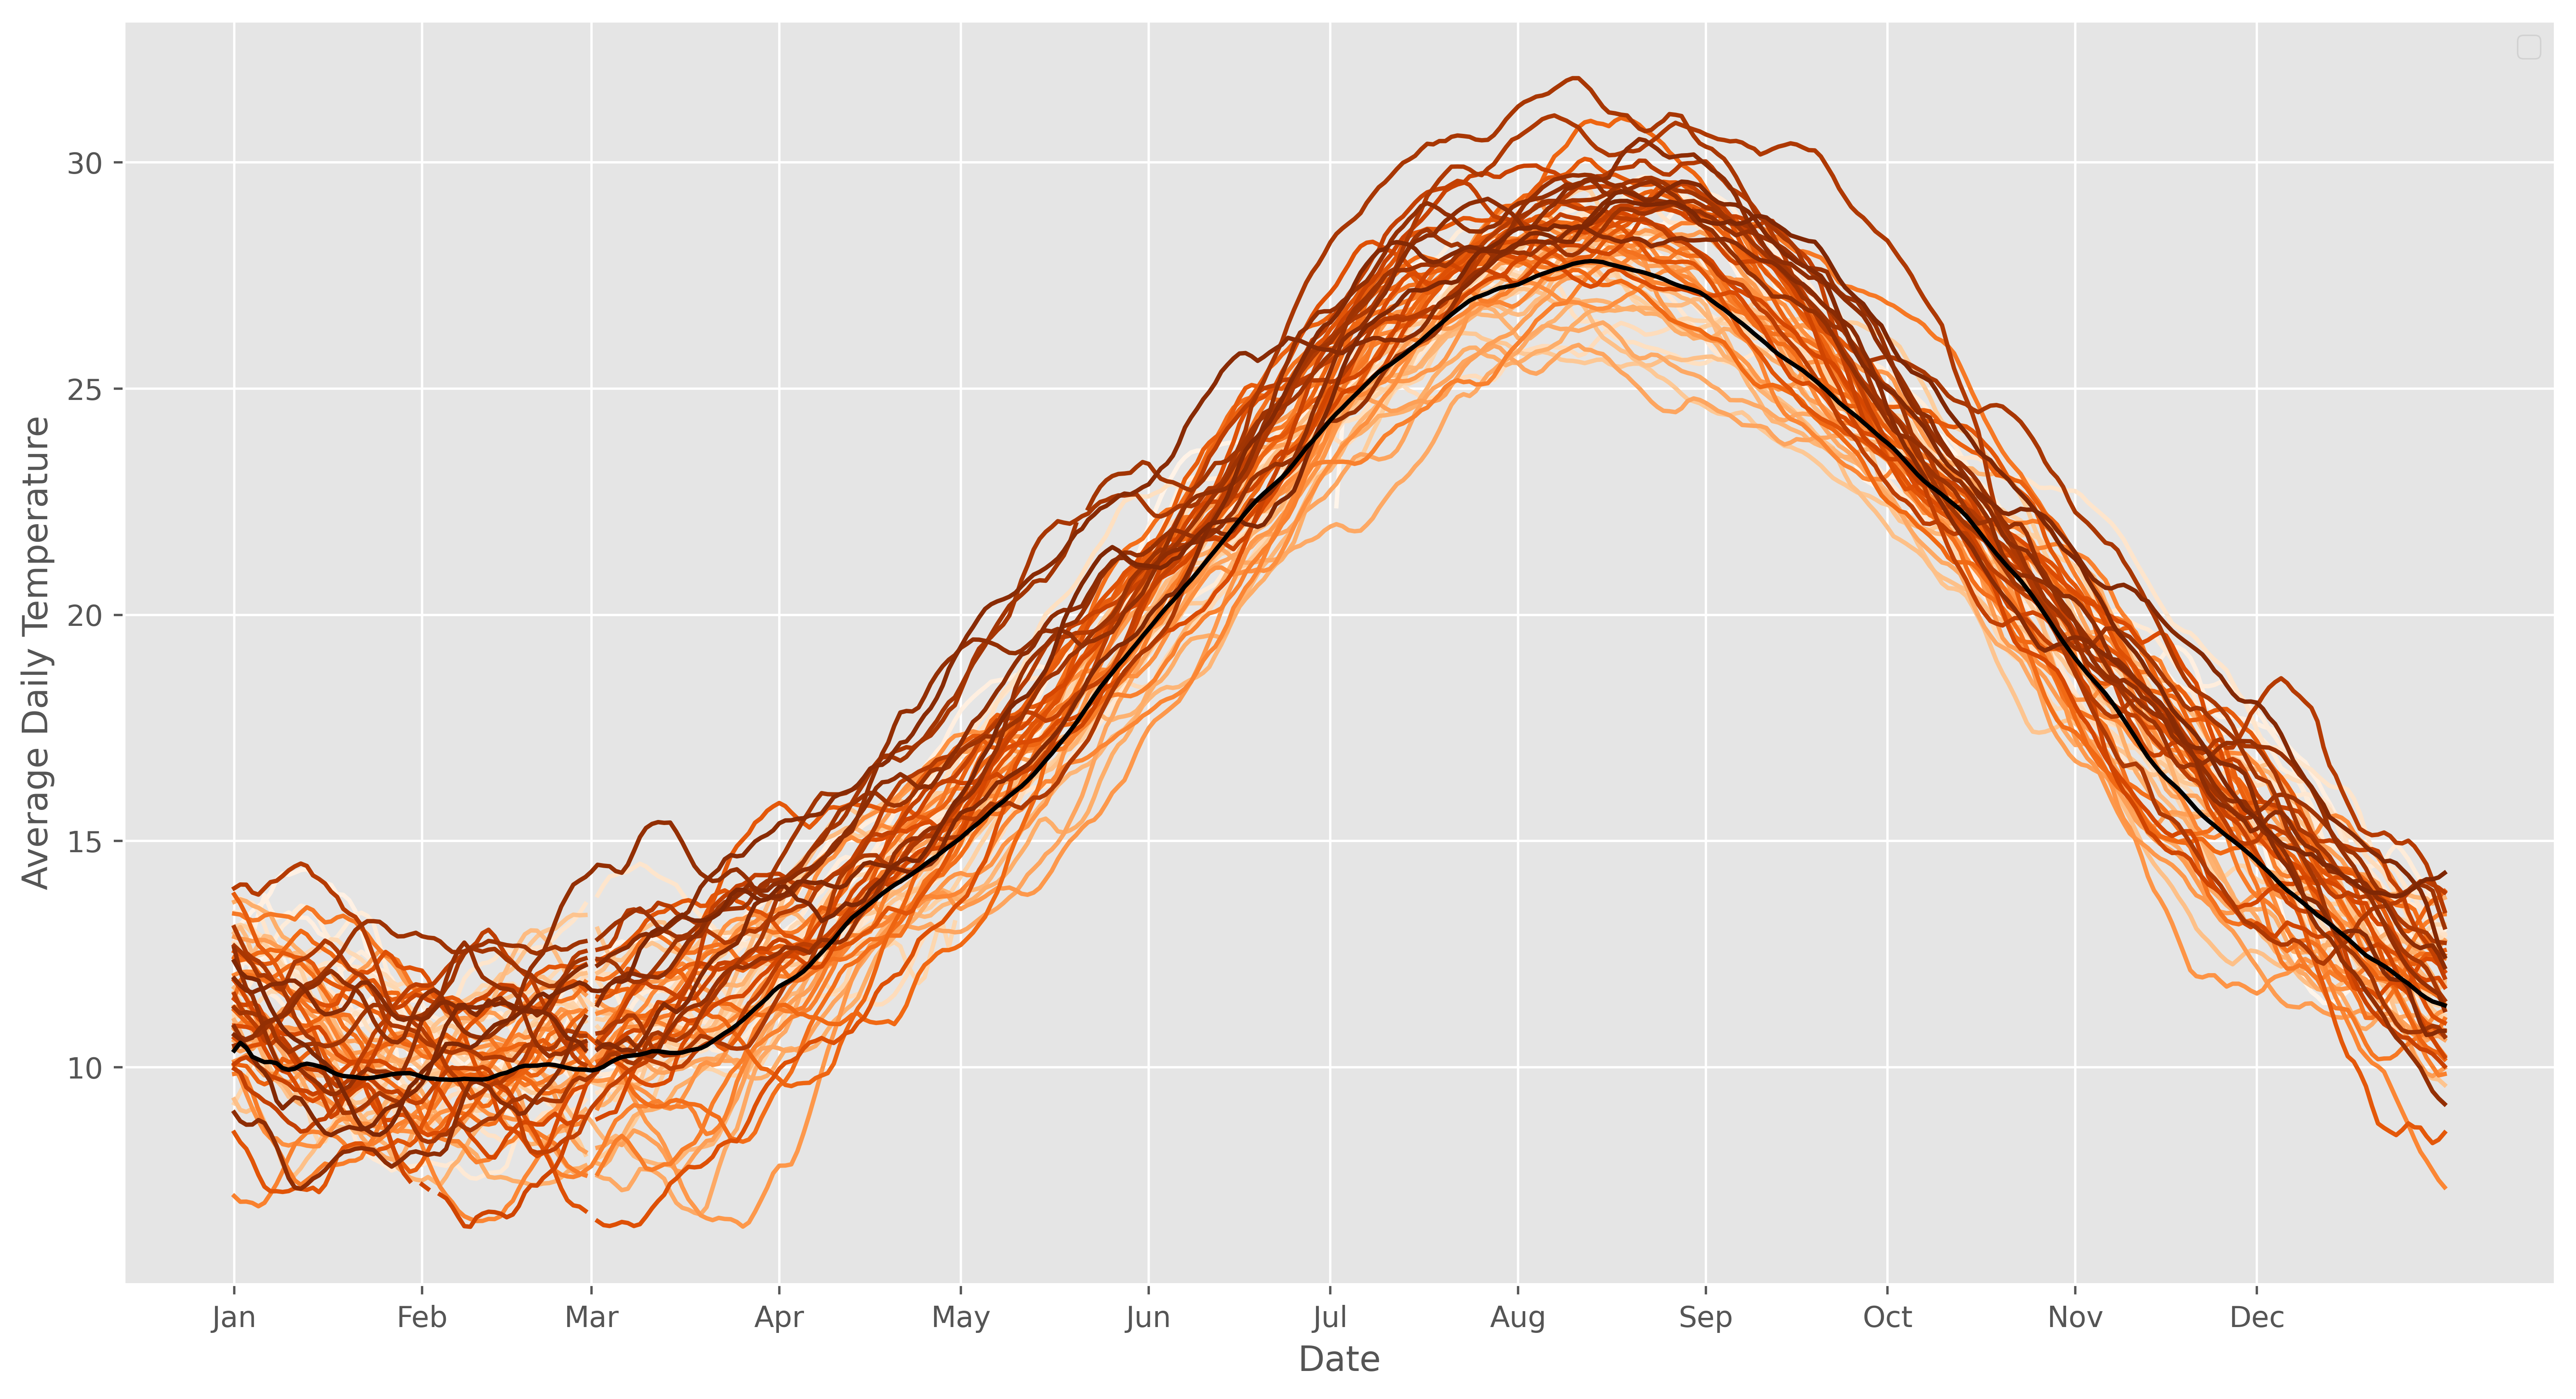

In [23]:
moving_average_pivot_table.index.names = ['month_index','day']
moving_average_pivot_table.reset_index(inplace=True)
moving_average_pivot_table.drop(['month_index', 'day'], axis=1, inplace=True)
ax = moving_average_pivot_table.plot(xticks=[0,31,59,90,120,151,181,212,243,273,304,334], cmap='Oranges', figsize =(15,8))
ax.set_xticklabels( ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel('Average Daily Temperature')
ax.set_xlabel('Date')
plt.legend("")
plt.plot(black_line_xaxis,black_line_yayis,color='black')

### Intepretation
* Observing the graph we come to 3 results.
1. As expected, it is obvious that the summer months are warmer than the others. 
2. Taking a look at the average daily temperature for the period of 1974-1999 (that is the black line) we observe that below it there are some lighter orange lines, indicating earlier years, when above it, the orange is getting darker, indicating that the corresponding days of most recent years are warmer.  
3. Specifically, on the summer months (June to August) this temperature differentiation between older and most recent year is even more obvious. 


## Q4 DEVIATION OF SUMMER TEMPERATURES 

* At this point, we would like to count the number of exreme temperature events per year compared to the baseline of 1974-1999
* Our first step woulbe be once again to find the baseline.
* We calculate the baseline as a the Mean Average Temperature for each day of the year
* To explain this better, in this case the baseline is not a number but a total of 366 numbers, one for each day of the year. 

In [24]:
mask = (data['DATE']>'1973-12-31') & (data['DATE'] <= '1999-12-31' ) 
dataframe_from_1974_to_1999 = data.loc[mask]
dataframe_from_1974_to_1999 = dataframe_from_1974_to_1999[['DATE','TAVG']]
TAVG_per_day = dataframe_from_1974_to_1999.groupby([dataframe_from_1974_to_1999.DATE.dt.month, dataframe_from_1974_to_1999.DATE.dt.day])['TAVG'].mean()

* Having caluclated the baseline, we will now try to count the extreme temperature events per year. 
* First, we want to extract the day and the month of each date of the data. We will create 2 seperate columns for this purpose. 

In [25]:
average_daily_temp = data[['DATE','TAVG']]
average_daily_temp.rename(columns = {'TAVG':'avg_temp_on_this_day'}, inplace = True)
average_daily_temp['dayofmonth'] = average_daily_temp['DATE'].dt.day
average_daily_temp['month'] = average_daily_temp['DATE'].dt.month 

Now, we will locate the baseline value that corresponds to every specific day. 

In [26]:
locate_day = TAVG_per_day.loc[average_daily_temp['month'],average_daily_temp['dayofmonth']]

* It would be helpful to merge the two dataframes, so that we can have the baseline value and the TAVG value of each day in the same dataframe. 
* To do that they must have a mutual point. 
* The combination of month and day of the month can be just that.  

In [27]:
average_daily_temp.set_index(['month','dayofmonth'], inplace = True)
locate_day.index.set_names(['month', 'dayofmonth'], inplace=True)
locate_day_as_dataframe = pd.DataFrame(locate_day)
locate_day_as_dataframe

TAVG
month dayofmonth           
1     1           10.365385
      2           10.707692
      3           10.207692
      4            9.634615
      5            9.919231
...                     ...
12    27           9.769231
      28          10.207692
      29          10.776923
      30          11.353846
      31          11.007692

[366 rows x 1 columns]

* And now we merge! 

In [28]:
merged_TAVG_and_baseline = average_daily_temp.merge(locate_day_as_dataframe, left_index=True, right_index=True)
merged_TAVG_and_baseline.set_index('DATE', inplace=True)
merged_TAVG_and_baseline = merged_TAVG_and_baseline.sort_index()
merged_TAVG_and_baseline.reset_index(inplace=True)
merged_TAVG_and_baseline

DATE  avg_temp_on_this_day       TAVG
0     1955-01-01                   NaN  10.365385
1     1955-01-02                   NaN  10.707692
2     1955-01-03                   NaN  10.207692
3     1955-01-04                   NaN   9.634615
4     1955-01-05                   NaN   9.919231
...          ...                   ...        ...
24098 2020-12-27                  16.6   9.769231
24099 2020-12-28                  14.8  10.207692
24100 2020-12-29                  16.3  10.776923
24101 2020-12-30                  16.4  11.353846
24102 2020-12-31                  15.4  11.007692

[24103 rows x 3 columns]

* For each day of each year, we assign the value <code>True</code>, if the daily TAVG is higher than the corresponding baseline value increased by 10%

In [29]:
merged_TAVG_and_baseline['extreme_hapened_on_this_day'] = merged_TAVG_and_baseline['avg_temp_on_this_day'] > merged_TAVG_and_baseline['TAVG']*1.1 

* We observe, that it would be useful to implement a simple method, which takes as index a Series and returns how many of its values are <code>True</code>

In [30]:
def count_true(series):
    return (series == True ).sum()

* By grouping the merged Dataframe based on the year, we apply the afformentioned method, to count how many extreme events happened on each year.
* This is equal to the sum of <code>True</code> values that we did 2 steps back.

In [31]:
grouped_by_year = merged_TAVG_and_baseline.groupby([merged_TAVG_and_baseline.DATE.dt.year])['extreme_hapened_on_this_day'].apply(count_true).reset_index(name='count_true')

* Lastly, in order to get the yearly percentage of extreme heat events, we will: 
1. Group the merged data by year
2. Count the amount of yearly observations 
3. Divide the amount of <code>True</code> values we found in the previous step with the values we found in step no.2

In [32]:
merged_data2 = merged_TAVG_and_baseline
merged_data2 = merged_data2.groupby([merged_TAVG_and_baseline.DATE.dt.year]).count() 
merged_data2.reset_index(drop=True,inplace=True)
grouped_by_year['amount_of_days'] = merged_data2['avg_temp_on_this_day']
grouped_by_year['pct_count_true'] = grouped_by_year['count_true']/grouped_by_year['amount_of_days']

* We also want to add to our plot the average percentage of extreme temperature events of the baseline. 
* This can simply be done by counting the mean of the percentage that was found in the previous step concerning the years from 1974 to 1999. 

In [33]:
mask = (grouped_by_year['DATE']>1973) & (grouped_by_year['DATE'] <= 1999 ) 
dataframe_from_1974_to_1999 = grouped_by_year.loc[mask]
horizontal_black_line = dataframe_from_1974_to_1999['pct_count_true'].mean()  

### And we draw! 

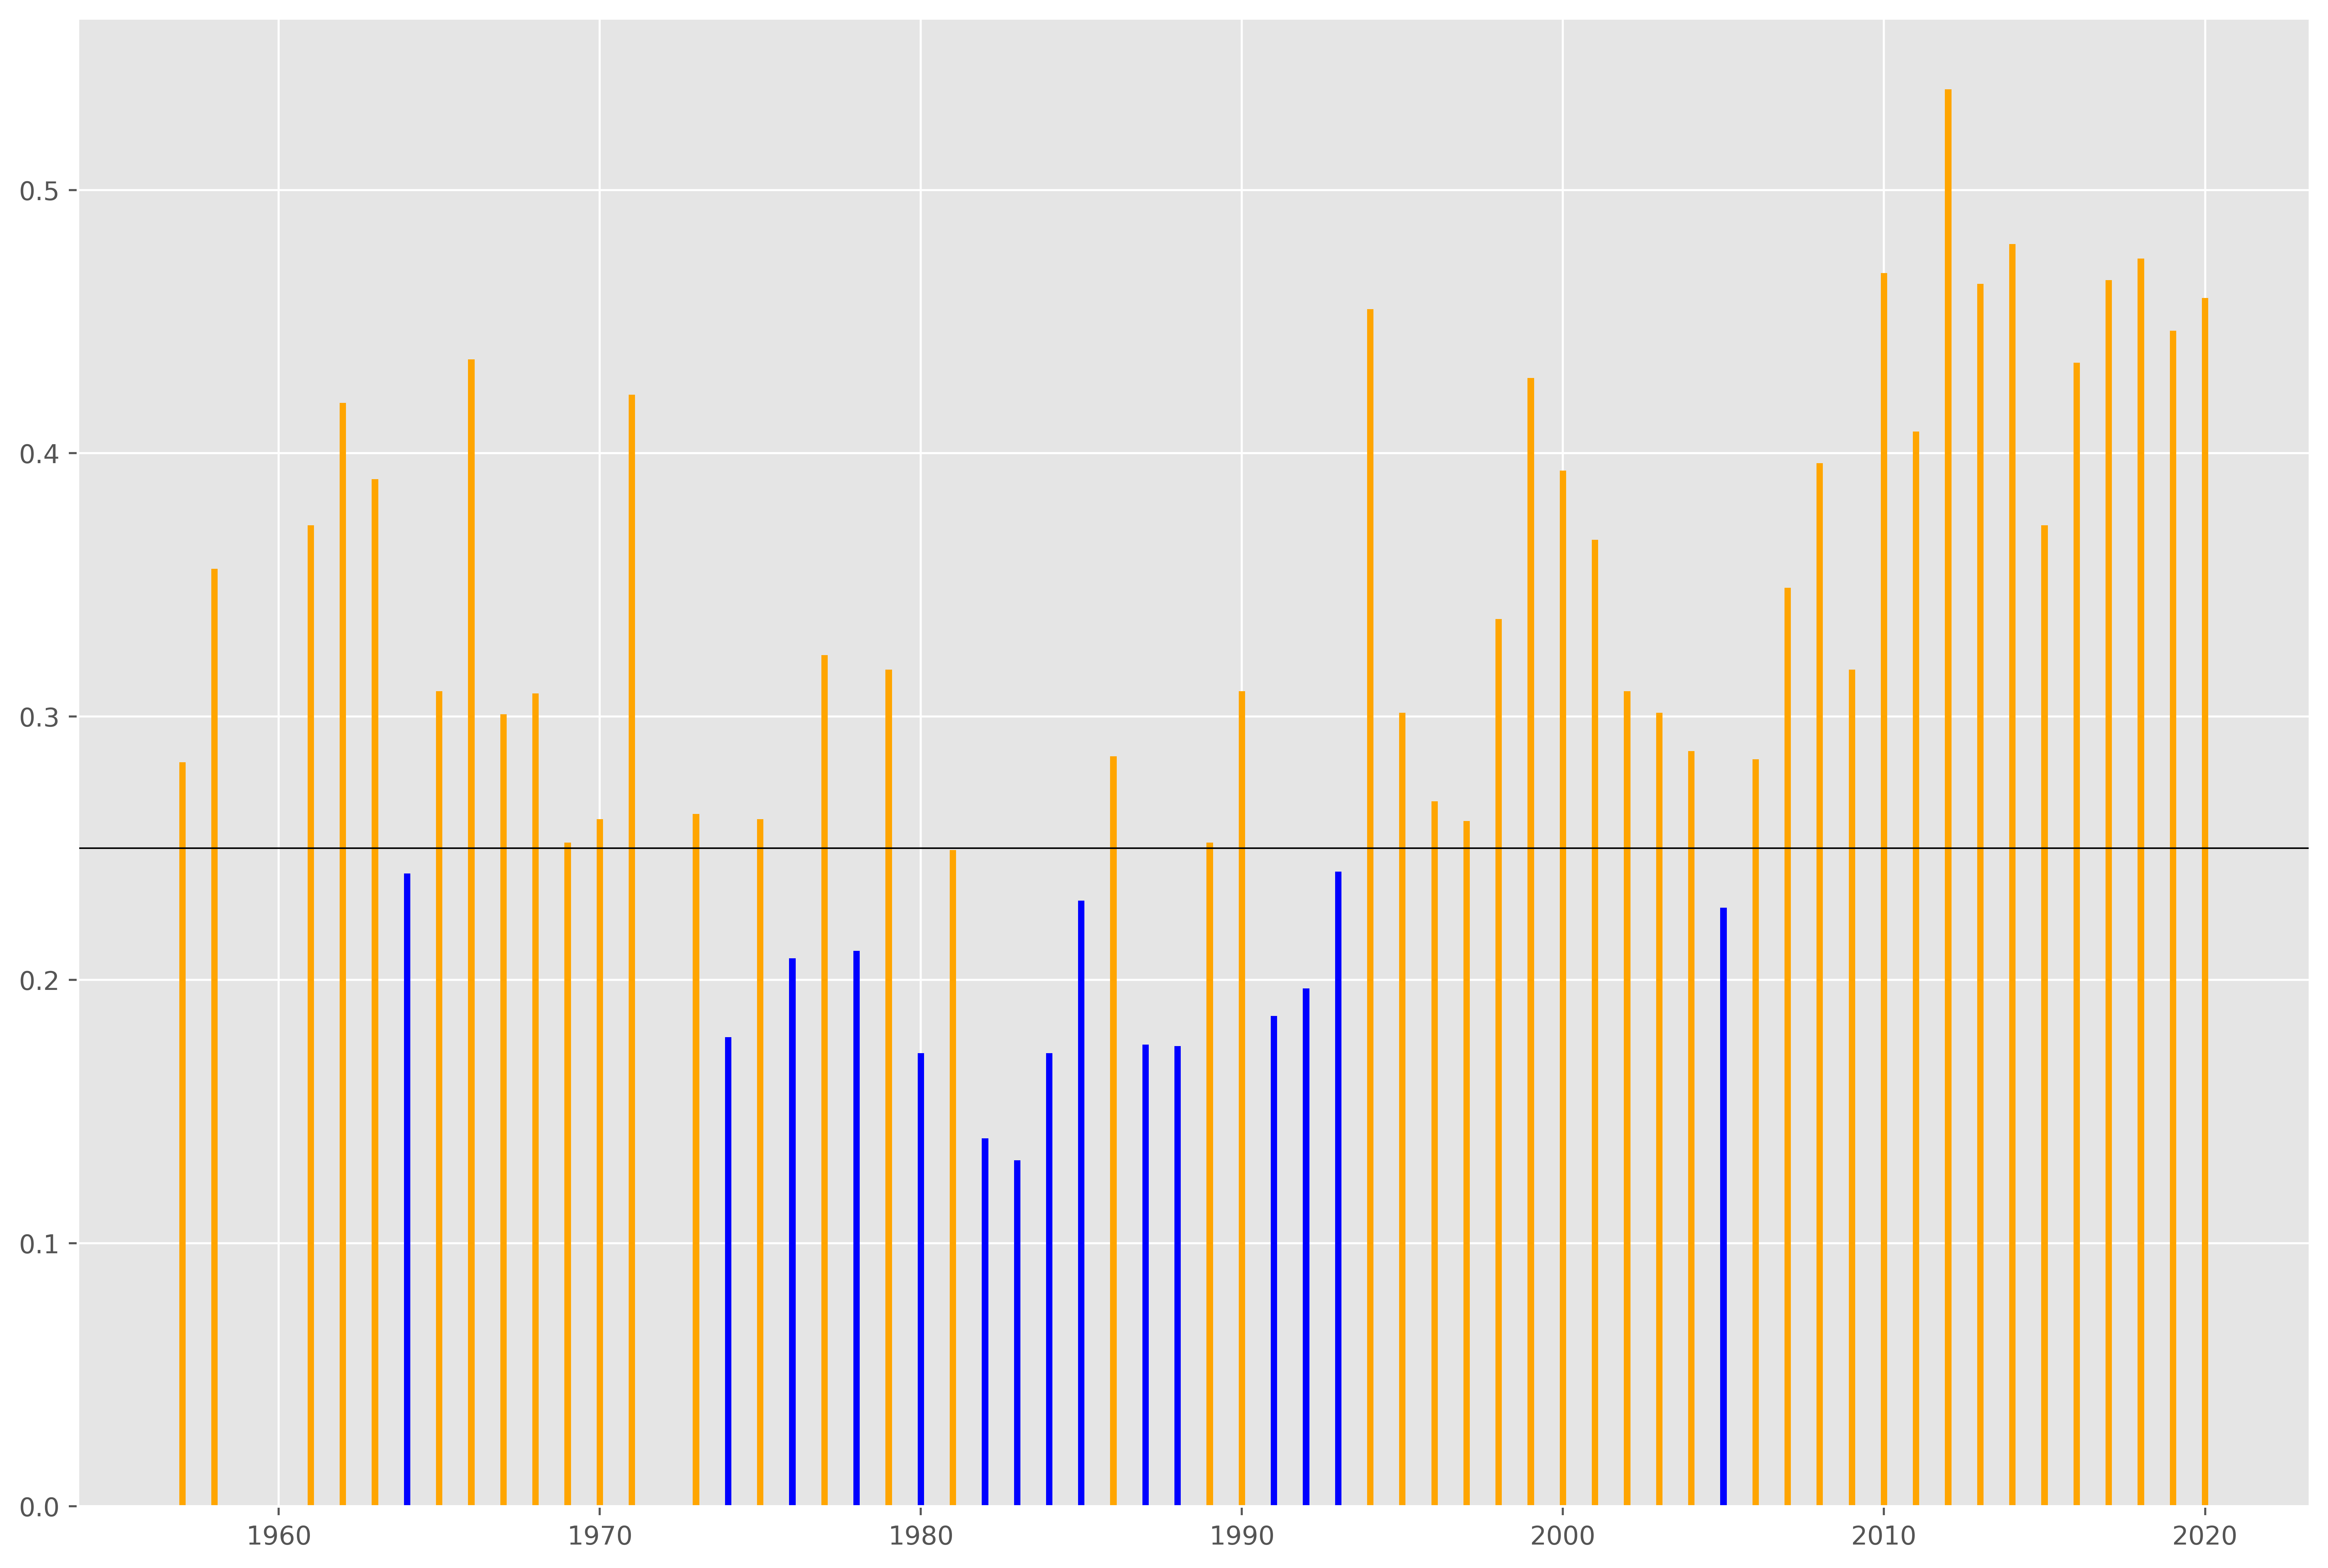

In [34]:
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
xaxis = grouped_by_year['DATE']
yaxis = grouped_by_year['pct_count_true'] 
colormat = np.where(yaxis > horizontal_black_line, 'orange','b')
ax.bar(xaxis,yaxis, color = colormat, width = 0.2)
plt.axhline(0.25, color='black',lw=0.6)

### Intepretation
* Observing the graph we come to 3 results.
1. As pointed out in the first graph, 2012 is once again under the microscope. This time, it is the year with the highest percentage of extreme heat events over the number of observations. 
2. Considering the last 25 years (1995-2020), we see that in every year, except from one, the extreme heat percentage is above the baseline! 
3. Specifically the last 10 years we are getting relatively high percentages!

## Q5 PRECIPITATION
* Moving on to the last part of this project, our aim is to get an indication of whether we are getting rain in more concentrated bursts. 
* We can find that by counting the overall rainfall over the years and the number of rainy days in each year. 

* As we did in the first part of this project, we will replace some missing data using our alternative dataset.
* Let's get into it!

In [35]:
data.set_index('DATE', inplace=True)
data['PRCP'].fillna(alternative_dataset['PRCP'],inplace=True)

* For memory and speed reasons we keep only the PRCP column that will be needed. 

In [36]:
data_precipitation = data['PRCP']
data_precipitation = data_precipitation.reset_index()
data_precipitation

DATE  PRCP
0     1955-01-01   0.0
1     1955-01-02   2.0
2     1955-01-03   0.0
3     1955-01-04   0.0
4     1955-01-05   0.0
...          ...   ...
24098 2020-12-27   0.0
24099 2020-12-28   6.6
24100 2020-12-29   0.0
24101 2020-12-30   0.0
24102 2020-12-31   0.0

[24103 rows x 2 columns]

* We want to find the rainy days.
* We will simply do that by checking if the corresponding value is positive, and place <code>True</code> if so. 

In [37]:
data_precipitation['rain_this_day'] = data_precipitation['PRCP'] > 0
data_precipitation

DATE  PRCP  rain_this_day
0     1955-01-01   0.0          False
1     1955-01-02   2.0           True
2     1955-01-03   0.0          False
3     1955-01-04   0.0          False
4     1955-01-05   0.0          False
...          ...   ...            ...
24098 2020-12-27   0.0          False
24099 2020-12-28   6.6           True
24100 2020-12-29   0.0          False
24101 2020-12-30   0.0          False
24102 2020-12-31   0.0          False

[24103 rows x 3 columns]

* Our goal now, is twofold:
1. Count the amount of rainy days each year had. 
2. Count the overall rainfall over each year.
* By grouping based on the year we can achieve each goal in one line!

In [38]:
rainy_days = data_precipitation.groupby([data_precipitation.DATE.dt.year])['rain_this_day'].apply(count_true).reset_index(name='rainy_days')
precipitation_yearly = data_precipitation.groupby(data_precipitation.DATE.dt.year)['PRCP'].sum().reset_index(name='mm_of_rain')

* Now, we want to find the ratio of rainfall over rainy days over the years. 
* We will simply do that by dividing the yearly rainfall with the number of rainy days in each year.

In [39]:
precipitation_yearly['amount_of_rainy_days'] = rainy_days['rainy_days']
precipitation_yearly.set_index('DATE', inplace=True)
precipitation_yearly['percentage'] = precipitation_yearly['mm_of_rain'] / precipitation_yearly['amount_of_rainy_days']
precipitation_yearly.reset_index(inplace=True)
precipitation_yearly

DATE  mm_of_rain  amount_of_rainy_days  percentage
0   1955       547.0                    68    8.044118
1   1956       281.3                    52    5.409615
2   1957       303.2                    73    4.153425
3   1958       350.0                    68    5.147059
4   1959       214.0                    62    3.451613
..   ...         ...                   ...         ...
61  2016       261.6                    42    6.228571
62  2017       304.3                    48    6.339583
63  2018       380.2                    55    6.912727
64  2019       570.0                    58    9.827586
65  2020       210.4                    38    5.536842

[66 rows x 4 columns]

* Lastly, we are overlaying the plot using a 10 years rolling average.
* Once again, we are using the pandas method <code> Dataframe.rolling </code>

In [40]:
precipitation_yearly['moving average'] = precipitation_yearly['percentage'].rolling(window=10,min_periods=1).mean() 
precipitation_yearly['moving average'] 

0     8.044118
1     6.726867
2     5.869053
3     5.688554
4     5.241166
        ...   
61    6.559611
62    6.637030
63    6.782793
64    7.227946
65    7.053591
Name: moving average, Length: 66, dtype: float64

### And we draw! 

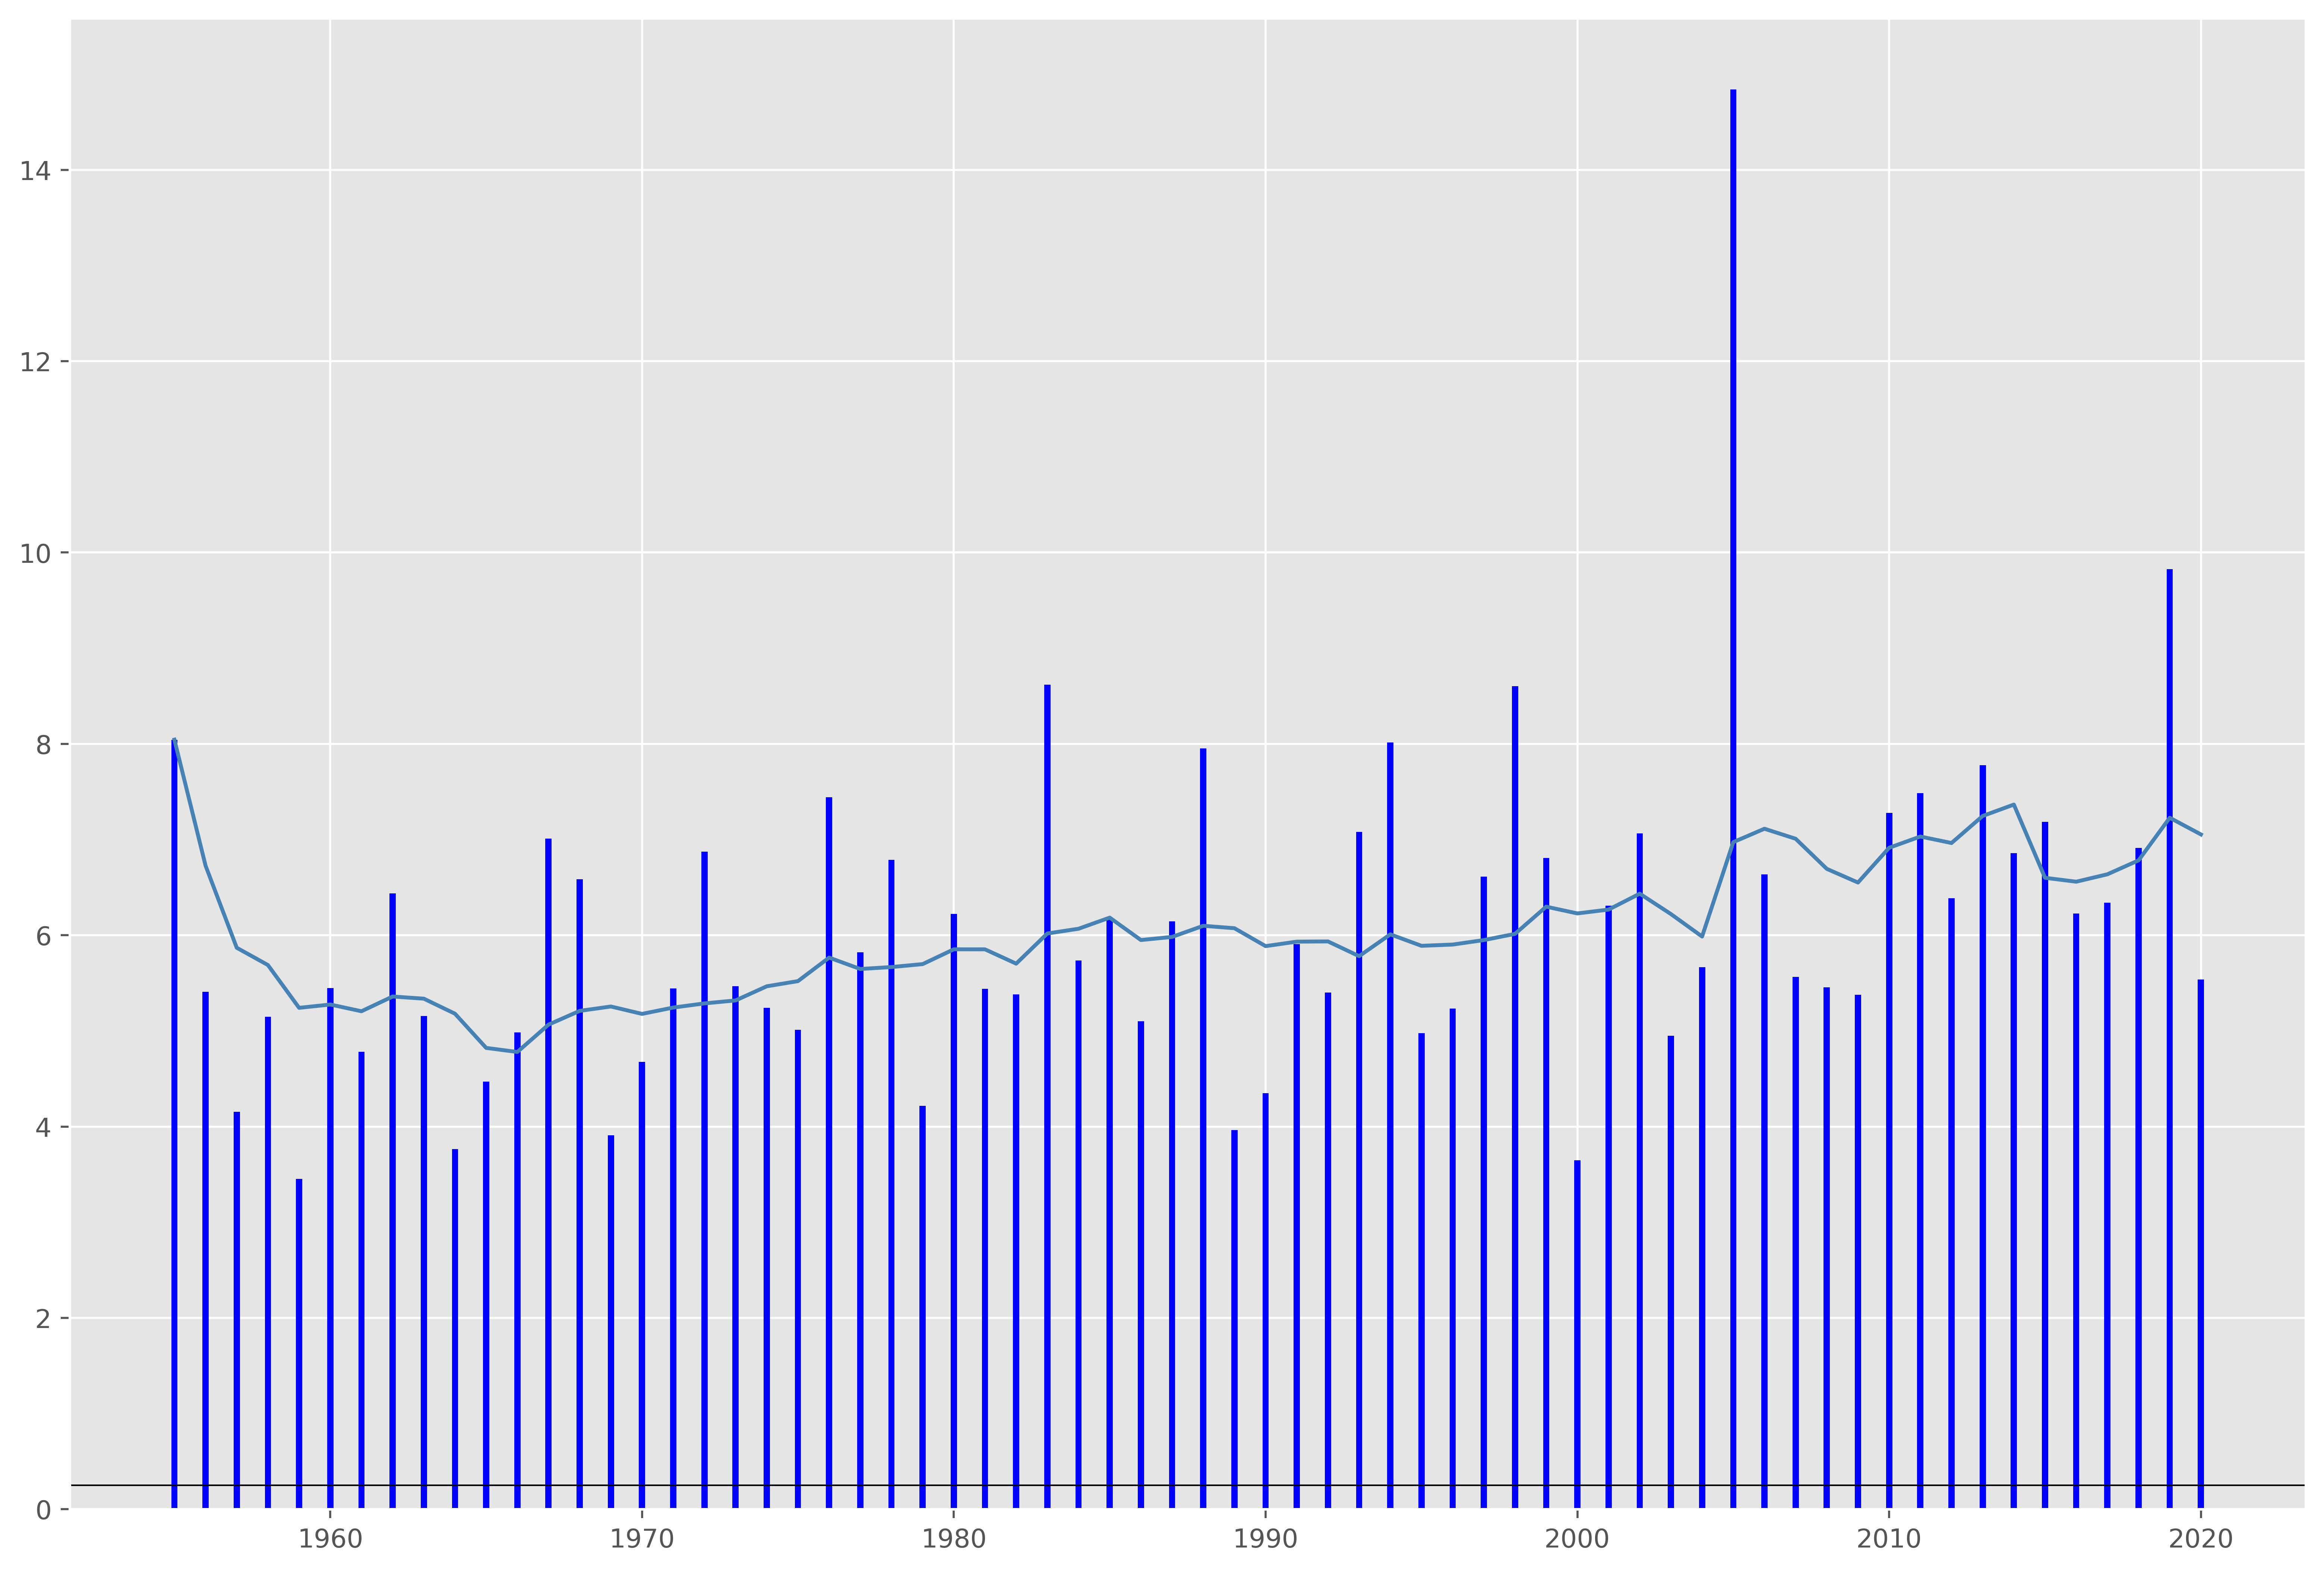

In [41]:
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
xaxis = precipitation_yearly['DATE']
yaxis = precipitation_yearly['percentage'] 
ax.bar(xaxis,yaxis, color = 'blue', width = 0.2)
plt.axhline(0.25, color='black',lw=0.6)
plt.plot(precipitation_yearly['DATE'],precipitation_yearly['moving average'],color='steelblue') 

### Intepretation
* Observing the graph we come to 4 results.
1. Taking a closer look at the rolling average, we can see a small increment over the years. 
2. We observe a frequency of 5 years where there is a year with higher value than its neighboors.
3. We observe another frequency of 10 years indicating relatively lower rainfall ratio over rainy days. (1960,1970,1980,1990,2000)
4. In 2006 there is a significant high rain ratio of rainfall. 

### Thanks to: 
* <code>Stack Overflow</code>, which was my closest friend the past week.
* <code>Pandas documentation </code> which helped me through some diffifcult moments.  